# Assignment B [25 marks]

####  Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

#### 1/. Calculate the monthly total spending for each GP-practice.

#### 2/. Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

#### 3/. Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

#### 4/. Visualize the relative costs per patient of all national GP-practices in a histogram.

#### 5/. Use descriptive statistics to show how your assigned city compares to the national level.

## Preliminaries.

In [1]:
# Importing pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL for the January 2016 gp practice data relating to the 'Numbers of Patients Registered at a GP Practice' has been used alongside the December 2015 GP practice and prescribing datasets.
# https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age

In [3]:
#All GP practices in the Dec2015 dataset presented in a tabulation.
cols2 = ['yearmonth', 'practice', 'name', 'address1', 'address2', 'address3', 'address4', 'postcode']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
gp_practices =  pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_practices = gp_practices.astype(str).apply(lambda x: x.str.lower())

In [4]:
#Total number of prescriptions for all GP practices in the Dec2015 dataset presented in a tabulation.
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
gp_prescriptions = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_prescriptions = gp_prescriptions.astype(str).apply(lambda x: x.str.lower())

In [5]:
# The January 2016 GP practice registration data is used here as no dataset for December 2015 exists.
# 2016 GP practice registration data relating to the 'Numbers of Patients Registered at a GP Practice'.
cols2 = ['practice', 'postcode', 'ons_ccg_code', 'ccg_code', 'ons_region_code', 'nhse_region_code', 'ons_comm_rgn_code', 'nhse_comm_region_code', 'total_all', 'total_male', 'total_female', 'male_0-4', 'male_5-9', 'male_10-14', 'male_15-19', 'male_20-24', 'male_25-29', 'male_30-34', 'male_35-39', 'male_40-44', 'male_45-49', 'male_50-54', 'male_55-59', 'male_60-64', 'male_65-69', 'male_70-74', 'male_75-79', 'male_80-84', 'male_85-89', 'male_90-94', 'male_95+', 'female_0-4', 'female_5-9', 'female_10-14', 'female_15-19', 'female_20-24', 'female_25-29', 'female_30-34', 'female_35-39', 'female_40-44', 'female_45-49', 'female_50-54', 'female_55-59', 'female_60-64', 'female_65-69', 'female_70-74','female_75-79', 'female_80-84', 'female_85-89', 'female_90-94', 'female_95+']
url='https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
gp_registered = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_registered = gp_registered.astype(str).apply(lambda x: x.str.lower())

In [6]:
# Converting the 'act_cost' column values to floats, 'items' column values as floats and the 'quantity' column values to integers.
gp_prescriptions['act_cost'] = gp_prescriptions['act_cost'].astype(float)
gp_prescriptions['items'] = gp_prescriptions['items'].astype(int)
gp_prescriptions['quantity'] = gp_prescriptions.quantity.astype(int)

In [7]:
# Converting the 'total_all' column values to integers.
gp_registered['total_all'] = gp_registered['total_all'].astype(int)

In [8]:
#

In [9]:
#

## 1/. Calculate the monthly total spending for each GP-practice.

In [10]:
# The monthly total spending for each GP-practice using the December 2015 dataset.
df_practice_group = pd.DataFrame(gp_prescriptions['act_cost'].groupby(gp_prescriptions['practice']).sum())
df_practice_group = df_practice_group.astype(float)
df_practice_group_sort = df_practice_group.sort_values(by='act_cost', ascending=0)
df_practice_group_sort = df_practice_group_sort.drop_duplicates()

# Resetting the index and displaying the tabulation.
df_practice_group_sort = df_practice_group_sort.reset_index()

# The dataframe presents the first 100 GP practices for representation purposes.
df_practice_group_sort.head(100)

,practice,act_cost
0,m85063,923786.26
1,b82005,693208.84
2,j82155,635726.91
3,k83002,592576.17
4,d82044,579644.99
5,c83019,547071.55
6,b82026,535822.74
7,l83100,534949.83
8,y01008,529974.70
9,c84024,522974.59


In [11]:
# Checking for duplications, no duplicates found.
pd.set_option('display.max_rows', 7500)
#dfas4_practice_group_sort.loc[~(dfas4_practice_group_sort.duplicated())]
df_practice_group_sort.loc[df_practice_group_sort.duplicated()]

,practice,act_cost


In [12]:
df_practice_group_sort.shape

(9881, 2)

In [13]:
#

In [14]:
#

## 2/. Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

In [15]:
# Tabulation of the number of registered patients in each GP-practice using the January 2016 GP practice registration dataset.
df_registered_patients = pd.DataFrame(gp_registered['total_all'].groupby(gp_registered['practice']).sum())
df_registered_patients = df_registered_patients.astype(int)
df_registered_patients_sort = df_registered_patients.sort_values(by='total_all', ascending=0)
df_registered_patients_sort = df_registered_patients_sort.drop_duplicates()

# Resetting the index and displaying the tabulation.
df_registered_patients_sort = df_registered_patients_sort.reset_index()
df_registered_patients_sort.head()

,practice,total_all
0,m85063,60352
1,b82005,55378
2,k83002,48115
3,m89003,40204
4,b86110,39138


In [16]:
# Checking for duplications; list of duplicates found.
pd.set_option('display.max_rows', 7500)
#gp_test = df_registered_patients_sort.loc[~(gp_registered_patients_sort.duplicated())]
df_registered_patients_sort.loc[df_registered_patients_sort.duplicated()]

,practice,total_all


In [17]:
df_registered_patients_sort.shape

(5941, 2)

In [18]:
# Merge of the GP practices and their associated prescriptions.
df_merge_gp = pd.merge(gp_practices, gp_prescriptions, on='practice')
df_merge_all = pd.merge(df_merge_gp, gp_registered, on='practice')
df_merge_all = df_merge_all.drop_duplicates()
df_merge_all.head()

,yearmonth,practice,name,address1,address2,address3,address4,postcode_x,sha,pct,...,female_50-54,female_55-59,female_60-64,female_65-69,female_70-74,female_75-79,female_80-84,female_85-89,female_90-94,female_95+
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,833,733,634,636,483,445,362,231,106,22
1,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,833,733,634,636,483,445,362,231,106,22
2,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,833,733,634,636,483,445,362,231,106,22
3,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,833,733,634,636,483,445,362,231,106,22
4,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,833,733,634,636,483,445,362,231,106,22


In [19]:
# Creating a new column named relative_patient_cost
def relative_cost(act_cost, total_all):
    return act_cost / total_all
df_merge_all['relative_patient_cost'] = relative_cost(df_merge_all['act_cost'], df_merge_all['total_all'])
df_merge_all.head()

,yearmonth,practice,name,address1,address2,address3,address4,postcode_x,sha,pct,...,female_55-59,female_60-64,female_65-69,female_70-74,female_75-79,female_80-84,female_85-89,female_90-94,female_95+,relative_patient_cost
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,733,634,636,483,445,362,231,106,22,0.000306
1,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,733,634,636,483,445,362,231,106,22,0.000141
2,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,733,634,636,483,445,362,231,106,22,0.000121
3,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,733,634,636,483,445,362,231,106,22,0.000383
4,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,q45,00k,...,733,634,636,483,445,362,231,106,22,0.013083


In [20]:
df_merge_all.shape

(10066343, 68)

In [21]:
# The relative_patient_cost by GP practice.
df_relative = df_merge_all.groupby(['practice']).sum()
df_relative_cost = df_relative['relative_patient_cost'].astype(float)

# Rounding to two decimal places, resetting the index.
df_relative_patient_cost = pd.DataFrame(df_relative_cost)
df_relative_patient_cost = df_relative_patient_cost.reset_index()
df_relative_patient_cost = df_relative_patient_cost.round(2)

# Merge relative patient cost with registered patient data, reset the index and display the tabulation.
df_relpatcost_reg = pd.merge(df_relative_patient_cost, df_registered_patients_sort, on='practice')
df_relpatcost_regpat = pd.merge(df_relpatcost_reg, df_practice_group_sort, on='practice')

# The dataframe presents the first 100 GP practices for representation purposes.
df_relpatcost_regpat.head(100)

,practice,relative_patient_cost,total_all,act_cost
0,a81002,16.94,19691,333514.67
1,a81003,14.29,3357,47977.16
2,a81004,16.12,9151,147494.85
3,a81005,13.66,7883,107669.51
4,a81006,15.99,12345,197436.78
5,a81007,14.55,9744,141780.85
6,a81009,15.22,9175,139612.91
7,a81011,16.46,11435,188196.12
8,a81012,14.12,4749,67075.08
9,a81013,15.16,6182,93712.27


In [22]:
df_relative_patient_cost.shape

(7700, 2)

In [23]:
#

In [24]:
#

## 3/. Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

### Wolverhampton data preparation.

In [25]:
# Tabulation of the 68 GP Practices in Wolverhampton.
df_wolverh_address3 = gp_practices[gp_practices['address3'].map(lambda address3: 'wolverh' in address3)]
df_wolverh_address4 = gp_practices[gp_practices['address4'].map(lambda address4: 'wolverh' in address4)]
df_wolverhampton = pd.concat([df_wolverh_address3, df_wolverh_address4])
df_wolverhampton

,yearmonth,practice,name,address1,address2,address3,address4,postcode
5061,201512,m82021,albrighton medical pract,albrighton medical pract,shaw lane albrighton,wolverhampton,,wv7 3dt
5112,201512,m83018,gravel hill surgery,gravel hill surgery,wombourne,wolverhampton,west midlands,wv5 9ha
5123,201512,m83031,russell house,russell house,bakers way codsall,wolverhampton,,wv8 1hd
5175,201512,m83097,bilbrook,bilbrook medical centre,brookfield road bilbrook,wolverhampton,west midlands,wv8 1dx
5190,201512,m83125,claverley,the surgery,spicers close claverley,wolverhampton,,wv5 7by
5196,201512,m83132,lakeside,lakeside medical centre,church road perton,wolverhampton,,wv6 7pd
5225,201512,m83668,tamar medical centre,tamar medical centre,severn drive perton,wolverhampton,,wv6 7ql
5684,201512,m92006,coalway road medical practice,the surgery,119 coalway rd penn,wolverhampton,west midlands,wv3 7na
5685,201512,m92007,lea road medical practice,lea road medical practice,35 lea road pennfields,wolverhampton,west midlands,wv3 0ls
5686,201512,m92008,castlecroft medical practice,castlecroft avenue,castlecroft,wolverhampton,west midlands,wv3 8jn


In [26]:
df_wolverhampton.shape

(68, 8)

In [27]:
# Tabulation of the 68 GP practices in Wolverhampton merged with the df_relative_patient_cost for all GP practices
# to produce a tabulation containing 41 GP practices in Wolverhampton and their respective relative_patient_cost.
# The reduction in the number of Wolverhampton matches may be associated to the different datasets (Dec 2015 and 
# Jan 2016) used in this assignment.
df_wolverhampton_list = pd.DataFrame(df_wolverhampton['practice'])
df_wolverhampton_list_merge1 = pd.merge(df_wolverhampton_list, df_relpatcost_regpat, on='practice')
df_wolverhampton_list_merge = pd.merge(df_practice_group_sort, df_wolverhampton_list_merge1, on=['practice', 'act_cost'])
df_wolverhampton_list_merged = df_wolverhampton_list_merge.groupby(df_wolverhampton_list_merge['practice']).sum()
df_wolverhampton_list_merge

,practice,act_cost,relative_patient_cost,total_all
0,m92009,258373.35,18.54,13933
1,m92010,186072.96,15.87,11725
2,m92008,183106.87,15.00,12204
3,m92011,179119.26,15.59,11489
4,m92024,175753.91,13.80,12735
5,m92002,153594.11,18.27,8406
6,m82021,152080.90,18.56,8196
7,m92607,151717.13,11.79,12871
8,m83097,110757.13,14.45,7665
9,m92654,108735.08,14.77,7361


In [28]:
df_wolverhampton_list_merge.shape

(41, 4)

### Scatter plots.

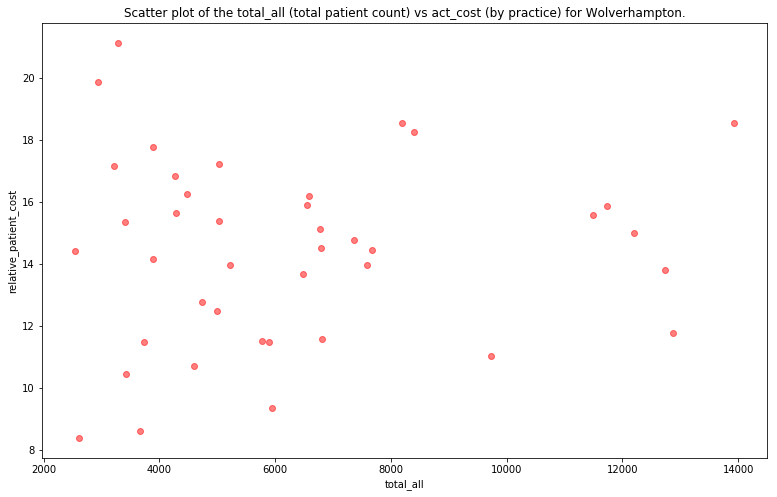

In [29]:
# Scatter plot of the total_cost (total patient count) vs relative_patient_cost for Wolverhampton.
df_wolver_scatter_rel_cost = plt.scatter(df_wolverhampton_list_merge['total_all'], df_wolverhampton_list_merge['relative_patient_cost'], color='red', marker='o', alpha=.5)
df_wolver_scatter_rel_cost
plt.title('Scatter plot of the total_all (total patient count) vs act_cost (by practice) for Wolverhampton.')
plt.xlabel('total_all')
plt.ylabel('relative_patient_cost')
plt.gcf().set_size_inches(13,8)

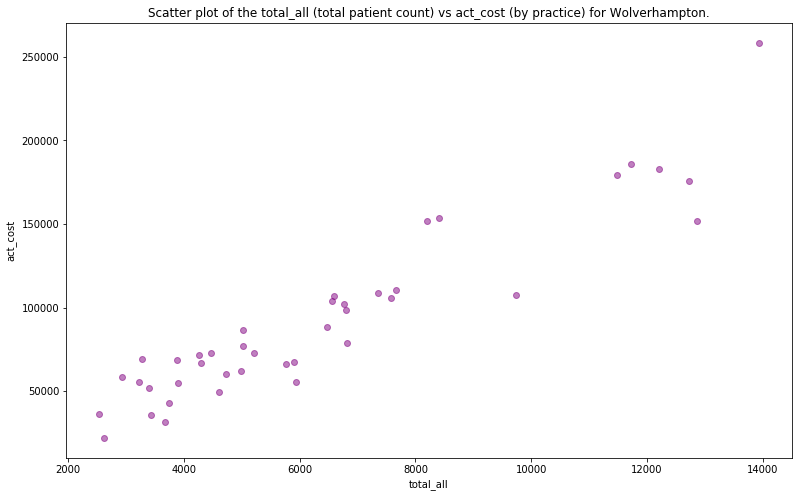

In [30]:
# Scatter plot of the total_all (total patient count) vs act_cost (by practice) for Wolverhampton.
df_wolver_scatter_act_cost = plt.scatter(df_wolverhampton_list_merge['total_all'], df_wolverhampton_list_merge['act_cost'], color='purple', marker='o', alpha=.5)
df_wolver_scatter_act_cost
plt.title('Scatter plot of the total_all (total patient count) vs act_cost (by practice) for Wolverhampton.')
plt.xlabel('total_all')
plt.ylabel('act_cost')
plt.gcf().set_size_inches(13,8)

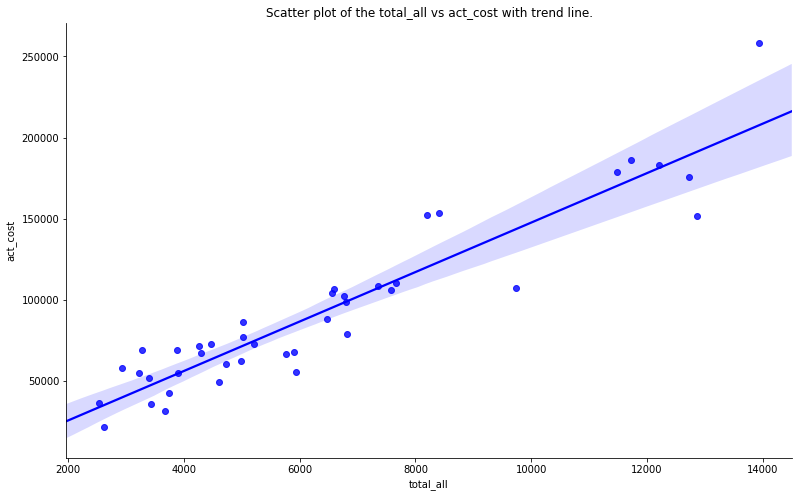

In [31]:
# Scatter plot of the total_all vs act_cost with trend line.
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot("total_all", "act_cost", data=df_wolverhampton_list_merge, robust=True, ci=95, color="blue")
sns.despine();
plt.title('Scatter plot of the total_all vs act_cost with trend line.')
plt.xlabel('total_all')
plt.ylabel('act_cost')
plt.gcf().set_size_inches(13,8)

In [32]:
#

In [33]:
#

### Data preparation for all national GP practices.

In [34]:
# Adding Log of relative_patient_cost to dataframe in order to limit the affects of outliers.
df_relative_patient_cost['log_relative_patient_cost'] = [np.log(x) for x in df_relative_patient_cost['relative_patient_cost']]
df_relative_patient_cost = df_relative_patient_cost[['practice', 'relative_patient_cost', 'log_relative_patient_cost']]

# The dataframe presents the first 100 national GP practices for representation purposes.
df_relative_patient_cost.head(100)

/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,practice,relative_patient_cost,log_relative_patient_cost
0,a81002,16.94,2.829678
1,a81003,14.29,2.659560
2,a81004,16.12,2.780061
3,a81005,13.66,2.614472
4,a81006,15.99,2.771964
5,a81007,14.55,2.677591
6,a81008,15.51,2.741485
7,a81009,15.22,2.722610
8,a81011,16.46,2.800933
9,a81012,14.12,2.647592


In [35]:
# Adding Log of total_all to dataframe in order to limit the affects of outliers.
df_relpatcost_regpat['log_total_all'] = [np.log(x) for x in df_relpatcost_regpat['total_all']]
df_relpatcost_regpat = df_relpatcost_regpat[['practice', 'total_all', 'log_total_all']]
df_relpatcost_regpat.head()

,practice,total_all,log_total_all
0,a81002,19691,9.887917
1,a81003,3357,8.118803
2,a81004,9151,9.121618
3,a81005,7883,8.972464
4,a81006,12345,9.421006


In [36]:
# Merge relative patient cost with registered patient data, reset the index and display the tabulation.
df_relpatcost_regpat_log = pd.merge(df_relative_patient_cost, df_practice_group_sort, on='practice')
df_relpatcost_regpat_log_combine = pd.merge(df_relpatcost_regpat_log, df_registered_patients_sort, on='practice')
df_relpatcost_regpat_log_merge = df_relpatcost_regpat_log_combine.sort_values(by='relative_patient_cost', ascending=0)
df_relpatcost_regpat_log_merge.head()

,practice,relative_patient_cost,log_relative_patient_cost,act_cost,total_all
1949,e87723,58319.78,10.973697,58319.78,1
5736,y01924,638.82,6.459623,71547.74,112
5860,y02873,248.05,5.513630,4960.98,20
5742,y02045,156.72,5.054461,626.88,4
5909,y04786,134.58,4.902159,42525.74,316


In [37]:
#

### Visually inspecting survey plots for outliers

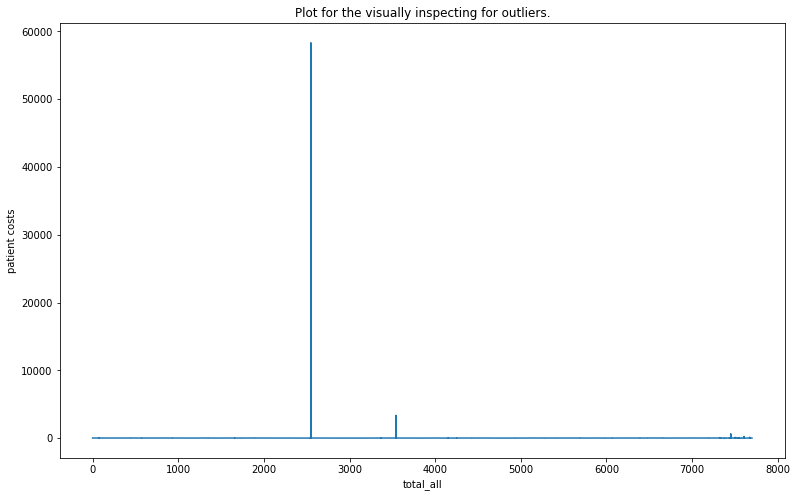

In [38]:
# Plot for the visually inspecting for outliers (not log scale).
df_relative_patient_cost['relative_patient_cost'].plot()
plt.title('Plot for the visually inspecting for outliers.')
plt.xlabel('total_all')
plt.ylabel('patient costs')
plt.gcf().set_size_inches(13,8)

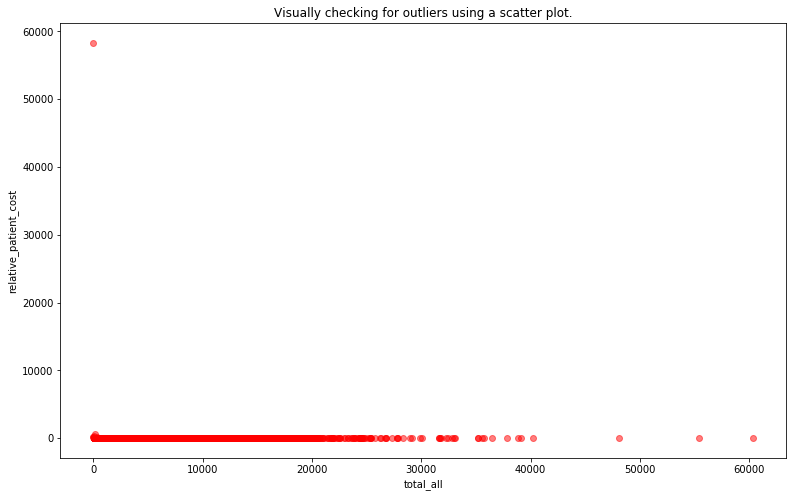

In [39]:
# Visually checking for outliers using a scatter plot (not log scale).
df_outlier_check = plt.scatter(df_relpatcost_regpat_log_merge['total_all'], df_relpatcost_regpat_log_merge['relative_patient_cost'], color='red', marker='o', alpha=.5)
df_outlier_check
plt.title('Visually checking for outliers using a scatter plot.')
plt.xlabel('total_all')
plt.ylabel('relative_patient_cost')
plt.gcf().set_size_inches(13,8)

In [40]:
#

### Limiting outliers.

In [41]:
# Limiting the y-axis range of relative_patient_cost values to remove outliers.
df_outlier_limited = df_relpatcost_regpat_log_merge[df_relpatcost_regpat_log_merge['relative_patient_cost'] < 100]
df_outlier_limited.drop_duplicates()
df_outlier_limited.head()

,practice,relative_patient_cost,log_relative_patient_cost,act_cost,total_all
5778,y02511,66.02,4.189958,46873.16,710
3185,h84608,63.91,4.157476,129486.70,2026
1944,e87711,60.89,4.109069,17292.71,284
59,a81630,60.70,4.105944,43215.99,712
5780,y02516,56.10,4.027136,45269.21,807


In [42]:
df_outlier_limited.shape

(5925, 5)

In [43]:
df_log_values_merge = pd.merge(df_outlier_limited, df_relpatcost_regpat, on='practice')
df_log_values_merge = df_log_values_merge[['practice', 'log_total_all', 'log_relative_patient_cost']]
df_log_values_merge.head()

,practice,log_total_all,log_relative_patient_cost
0,y02511,6.565265,4.189958
1,h84608,7.613819,4.157476
2,e87711,5.648974,4.109069
3,a81630,6.568078,4.105944
4,y02516,6.693324,4.027136


In [44]:
df_log_values_merge.shape

(5925, 3)

### Scatter plots.

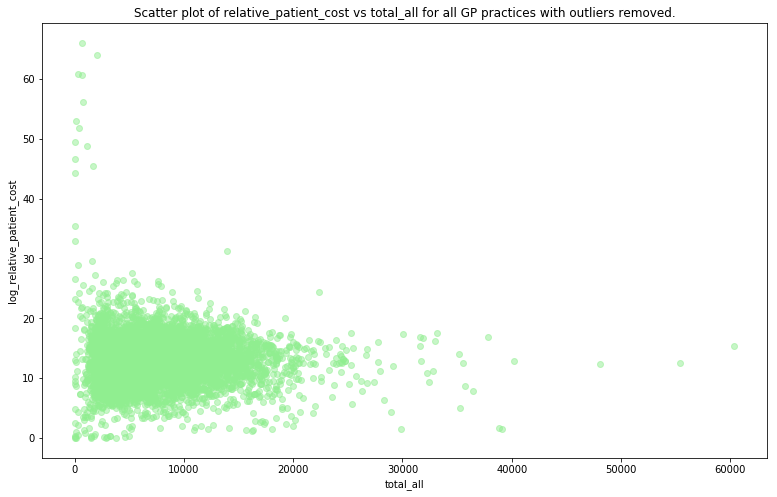

In [45]:
# Scatter plot of relative_patient_cost vs total_all for all GP practices with outliers removed (not log scale).
df_outlier_checked = plt.scatter(df_outlier_limited['total_all'], df_outlier_limited['relative_patient_cost'], color='lightgreen', marker='o', alpha=.5)
df_outlier_checked
plt.title('Scatter plot of relative_patient_cost vs total_all for all GP practices with outliers removed.')
plt.xlabel('total_all')
plt.ylabel('log_relative_patient_cost')
plt.gcf().set_size_inches(13,8)

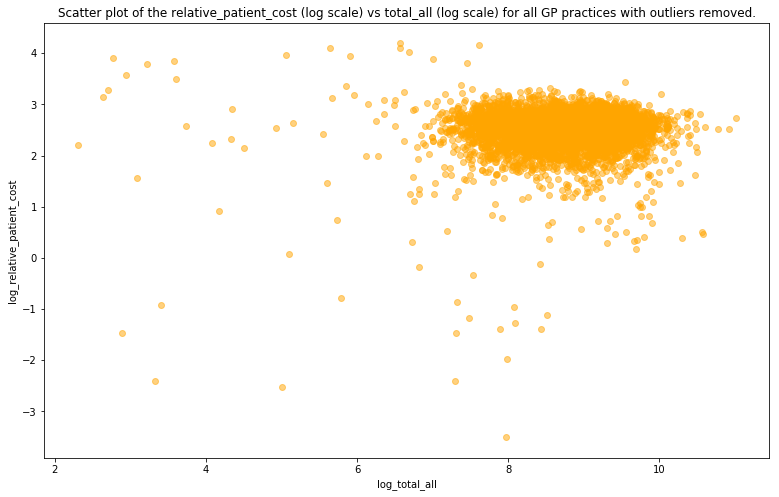

In [46]:
# Scatter plot of the relative_patient_cost (log scale) vs total_all (log_scale) for all GP practices with outliers removed (log scale).
df_outlier_checked_logplot = plt.scatter(df_log_values_merge['log_total_all'], df_log_values_merge['log_relative_patient_cost'], color='orange', marker='o', alpha=.5)
df_outlier_checked_logplot
plt.title('Scatter plot of the relative_patient_cost (log scale) vs total_all (log scale) for all GP practices with outliers removed.')
plt.xlabel('log_total_all')
plt.ylabel('log_relative_patient_cost')
plt.gcf().set_size_inches(13,8)

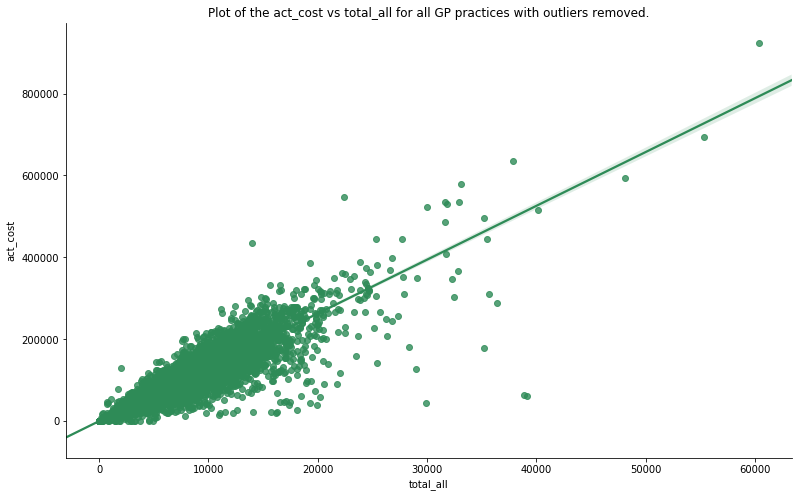

In [47]:
# Plot of the act_cost vs total_all for all GP practices with outliers removed (not log scale).
f, ax = plt.subplots(figsize=(13, 8))
sns.regplot("total_all", "act_cost", data=df_outlier_limited, robust=True, ci=95, color="seagreen")
sns.despine();
plt.title('Plot of the act_cost vs total_all for all GP practices with outliers removed.')
plt.xlabel('total_all')
plt.ylabel('act_cost')
plt.gcf().set_size_inches(13,8)

In [48]:
#

In [49]:
#

### Combined scatter plot of Wolverhampton GP practices and national GP practices.

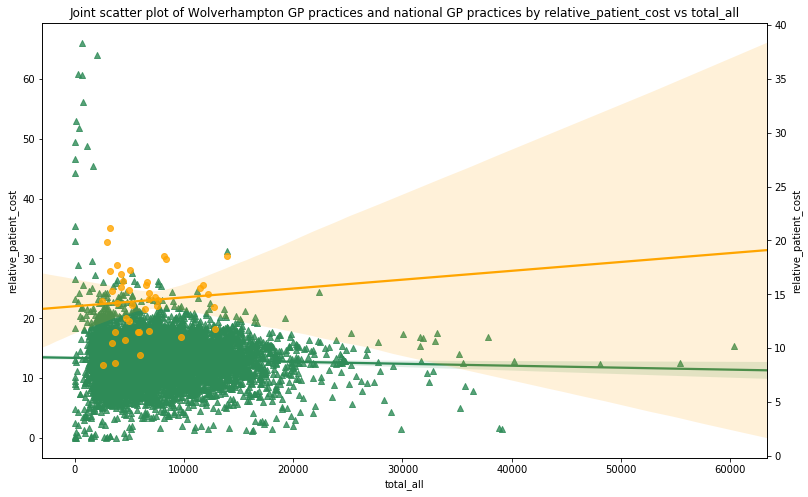

In [50]:
#  Joint scatter plot of Wolverhampton GP practices and national GP practices by relative_patient_cost vs total_all (not log scale).
fig, ax = plt.subplots()
sns.regplot('total_all', 'relative_patient_cost', data=df_outlier_limited, ax=ax, marker='^', color='seagreen')
ax2 = ax.twinx()
sns.regplot('total_all', 'relative_patient_cost', data=df_wolverhampton_list_merge, ax=ax2, marker='o', color='orange')
plt.title('Joint scatter plot of Wolverhampton GP practices and national GP practices by relative_patient_cost vs total_all')
plt.ylabel('relative_patient_cost')
plt.gcf().set_size_inches(13,8)

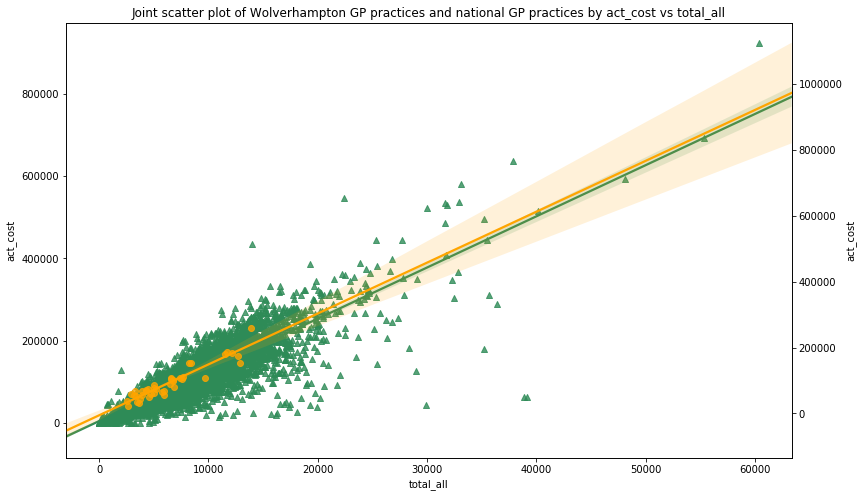

In [51]:
#  Joint scatter plot of Wolverhampton GP practices and national GP practices by act_cost vs total_all (not log scale).
fig, ax = plt.subplots()
sns.regplot('total_all', 'act_cost', data=df_outlier_limited, ax=ax, marker='^', color='seagreen')
ax2 = ax.twinx()
sns.regplot('total_all', 'act_cost', data=df_wolverhampton_list_merge, ax=ax2, marker='o', color='orange')
plt.title('Joint scatter plot of Wolverhampton GP practices and national GP practices by act_cost vs total_all')
plt.ylabel('act_cost')
plt.gcf().set_size_inches(13,8)

In [52]:
#

In [53]:
#

## 4/. Visualize the relative costs per patient of all national GP-practices in a histogram.

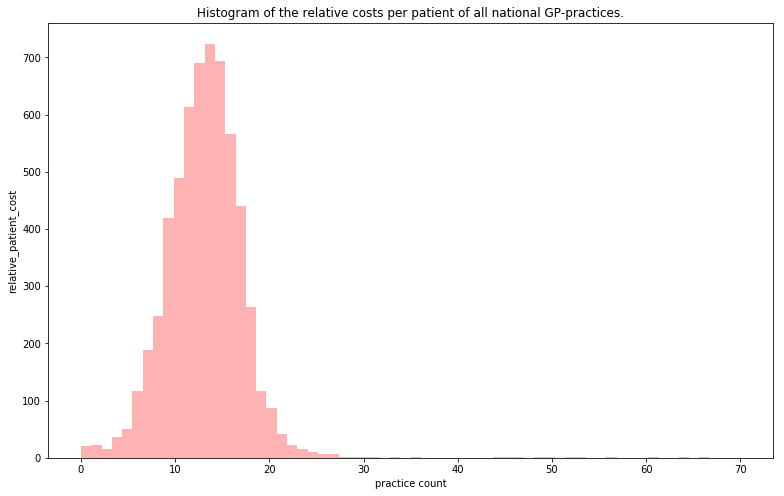

In [54]:
# Histogram of the relative costs per patient of all national GP-practices.
plt.hist(df_outlier_limited['relative_patient_cost'], bins=64, range=(0, 70), normed=False,
 color='red', alpha=0.3)
#ax = sns.distplot(df_outlier_limited['relative_patient_cost'], rug=True, hist=False)
plt.title('Histogram of the relative costs per patient of all national GP-practices.')
plt.xlabel('practice count')
plt.ylabel('relative_patient_cost')
plt.gcf().set_size_inches(13,8)

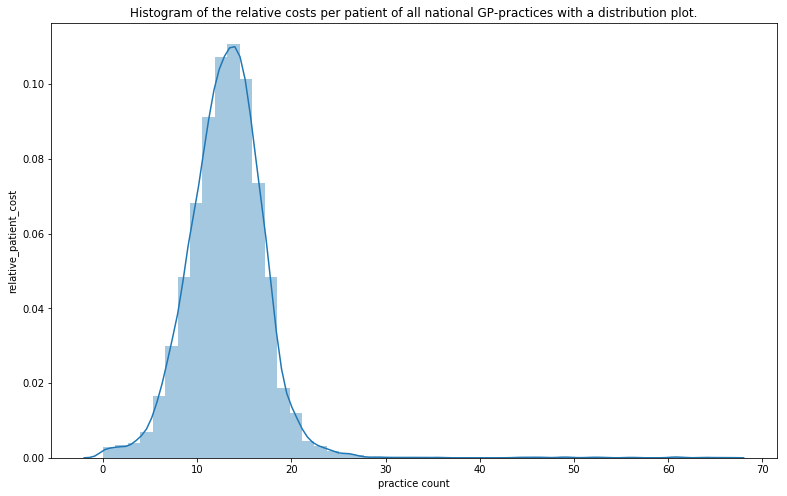

In [55]:
# Histogram of the relative costs per patient of all national GP-practices with a distribution plot.
sns.distplot(df_outlier_limited['relative_patient_cost'])
plt.title('Histogram of the relative costs per patient of all national GP-practices with a distribution plot.')
plt.xlabel('practice count')
plt.ylabel('relative_patient_cost')
plt.gcf().set_size_inches(13,8)

In [56]:
# Skewness value for national GP pracitces.
df_outlier_limited['relative_patient_cost'].skew()

1.9434117739008432

In [57]:
#

In [58]:
#

## 5/. Use descriptive statistics to show how your assigned city compares to the national level.

In [59]:
# Descriptive statistics for act_cost, relative_patient_cost, total_all for national GP practices.
df_stat_relative_cost_national = df_relpatcost_regpat.describe()
df_stat_relative_cost_national.round(2)

,total_all,log_total_all
count,5931.00,5931.00
mean,7864.28,8.75
std,4903.43,0.76
min,1.00,0.00
25%,4162.50,8.33
50%,7065.00,8.86
75%,10595.00,9.27
max,60352.00,11.01


In [60]:
# # Descriptive statistics for act_cost, relative_patient_cost, total_all for Wolverhampton GP practices.
df_stat_relative_cost_wolverhampton = df_wolverhampton_list_merge.describe()
df_stat_relative_cost_wolverhampton.round(2)

,act_cost,relative_patient_cost,total_all
count,41.00,41.00,41.00
mean,92437.27,14.42,6358.49
std,51018.30,2.99,3091.77
min,21953.12,8.40,2537.00
25%,58329.34,11.79,3892.00
50%,72793.40,14.53,5770.00
75%,107365.64,16.19,7585.00
max,258373.35,21.12,13933.00


In [61]:
# Descriptive statistics for national GP practices by practice.
df_stat_practice_national = df_relpatcost_regpat_log_merge['relative_patient_cost'].groupby(df_relpatcost_regpat['practice']).describe()

# The dataframe presents the first 100 national GP practices for representation purposes.
df_stat_practice_national.head(100)

,count,mean,std,min,25%,50%,75%,max
practice,,,,,,,,
a81002,1.0,16.94,NaN,16.94,16.94,16.94,16.94,16.94
a81003,1.0,14.29,NaN,14.29,14.29,14.29,14.29,14.29
a81004,1.0,16.12,NaN,16.12,16.12,16.12,16.12,16.12
a81005,1.0,13.66,NaN,13.66,13.66,13.66,13.66,13.66
a81006,1.0,15.99,NaN,15.99,15.99,15.99,15.99,15.99
a81007,1.0,14.55,NaN,14.55,14.55,14.55,14.55,14.55
a81009,1.0,15.22,NaN,15.22,15.22,15.22,15.22,15.22
a81011,1.0,16.46,NaN,16.46,16.46,16.46,16.46,16.46
a81012,1.0,14.12,NaN,14.12,14.12,14.12,14.12,14.12


In [62]:
# Descriptive statistics for GP practices in Wolverhampton by practice.
df_stat_practice_wolverhampton = df_wolverhampton_list_merge['relative_patient_cost'].groupby(df_wolverhampton_list_merge['practice']).describe()

# The dataframe presents the first 100 national GP practices for representation purposes.
df_stat_practice_wolverhampton.head(100)

,count,mean,std,min,25%,50%,75%,max
practice,,,,,,,,
m82021,1.0,18.56,NaN,18.56,18.56,18.56,18.56,18.56
m83018,1.0,13.96,NaN,13.96,13.96,13.96,13.96,13.96
m83031,1.0,14.53,NaN,14.53,14.53,14.53,14.53,14.53
m83097,1.0,14.45,NaN,14.45,14.45,14.45,14.45,14.45
m83125,1.0,15.64,NaN,15.64,15.64,15.64,15.64,15.64
m83132,1.0,11.48,NaN,11.48,11.48,11.48,11.48,11.48
m83715,1.0,12.76,NaN,12.76,12.76,12.76,12.76,12.76
m92001,1.0,15.35,NaN,15.35,15.35,15.35,15.35,15.35
m92002,1.0,18.27,NaN,18.27,18.27,18.27,18.27,18.27


In [63]:
# Correlation matrix of values for Wolverhampton.
df_stat_relative_cost_wolverhampton.corr()

,act_cost,relative_patient_cost,total_all
act_cost,1.000000,-0.029783,0.984163
relative_patient_cost,-0.029783,1.000000,-0.101516
total_all,0.984163,-0.101516,1.000000


In [64]:
# Correlation matrix of values for national GP practices.
df_relpatcost_regpat_log_merge[['act_cost', 'relative_patient_cost', 'total_all']].corr()

,act_cost,relative_patient_cost,total_all
act_cost,1.000000,-0.006700,0.875461
relative_patient_cost,-0.006700,1.000000,-0.021471
total_all,0.875461,-0.021471,1.000000


In [ ]:
#